# Laboratorio de regresión - 2

Santiago Reyes Castillo
29 de enero, 2025   |

## Regresión polinomial

Observa la siguiente gráfica.

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

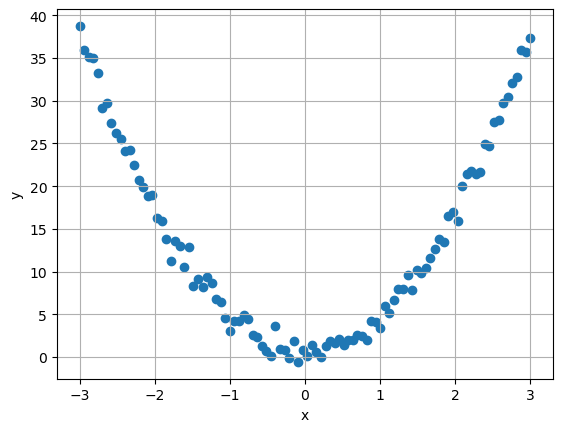

In [22]:
#import matplotlib.pyplot as plt; import numpy as np
%matplotlib inline
np.random.seed(0)
x = np.linspace(-3, 3, 100); y = 1 + 4*x**2 + np.random.normal(0, 1, 100)
plt.figure(); plt.xlabel("x"); plt.ylabel("y")
plt.scatter(x, y); plt.grid()
plt.show()

Utiliza `sklearn` para realizar una regresión lineal simple ($\hat{y} = \hat{\beta_0} + \hat{\beta_1}x $)

Crea una gráfica donde se muestren las observaciones como una nube de puntos y la línea que ajustaste con regresión. Calcula el métrico $R^2$.

In [25]:
def regression_array(x, y, degree):

    x = np.reshape(x, [-1,1])
    y = np.reshape(y, [-1,1]) 
    
    X = x.copy()
    for i in range (2, degree+1):
        X = np.hstack((X, x**i))

    model = LinearRegression()
    model = model.fit(X, y)

    intercept = model.intercept_
    coef = model.coef_

    r2 = model.score(X,y)

    y_pred = model.predict(X)

    sorted_indices = np.argsort(x[:, 0])
    x_sorted = x[sorted_indices]
    X_sorted = X[sorted_indices]
    y_pred_sorted = model.predict(X_sorted)  
    
    
    #gráfica
    plt.figure(figsize=(10, 6))
    plt.grid()
    plt.scatter(x, y, color='black', label="Datos Originales")  # Scatter plot of original data
    plt.plot(x_sorted, y_pred_sorted, color='blue', label='Predicción')  # Regression curve
    plt.legend(loc="best")
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title(f'Regresión Polinomial de Grado {degree}')
    plt.show()

    return print('Intercepto: ', intercept[0], 'Coeficiente(s): ', coef[0], 'R2: ', r2) 


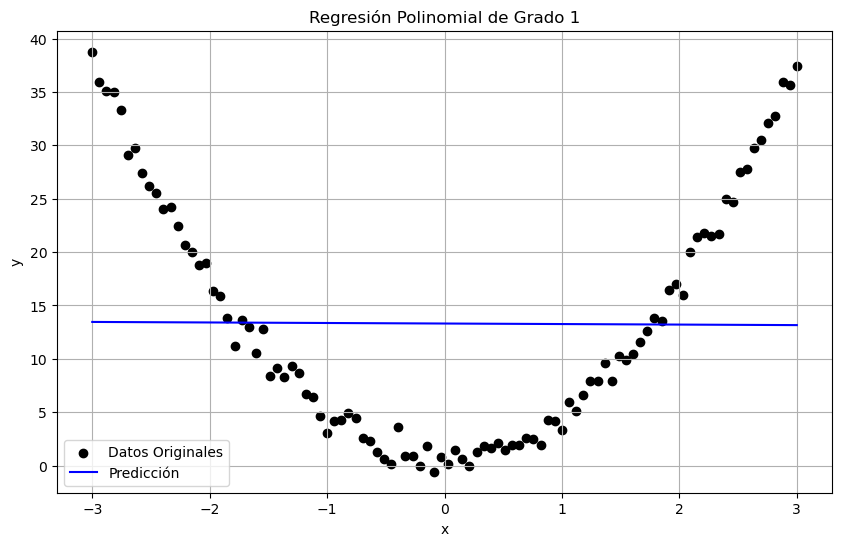

Intercepto:  13.30223225795873 Coeficiente(s):  [-0.04955448] R2:  5.80345273922811e-05


In [26]:
regression_array(x, y, 1)

Podemos ver que el ajuste no es correcto, pues parece que tiene un comportamiento cuadrático y estamos intentando ajustar una línea recta.

En lugar de hacer una regresión lineal simple, quizás podamos extender el modelo para que tenga varios factores dentro:

$$ Y = \beta_0 + \beta_1 X + \beta_2 X^2 + ... + \beta_p X^p + \epsilon$$

Ajusta un modelo cuadrático con `sklearn` ($\hat{y} = \hat{\beta_0} + \hat{\beta_1}x + \hat{\beta_1}x^2 $) y calcula su $R^2$.

Crea una gráfica con las observaciones y la nueva curva que ajustaste.

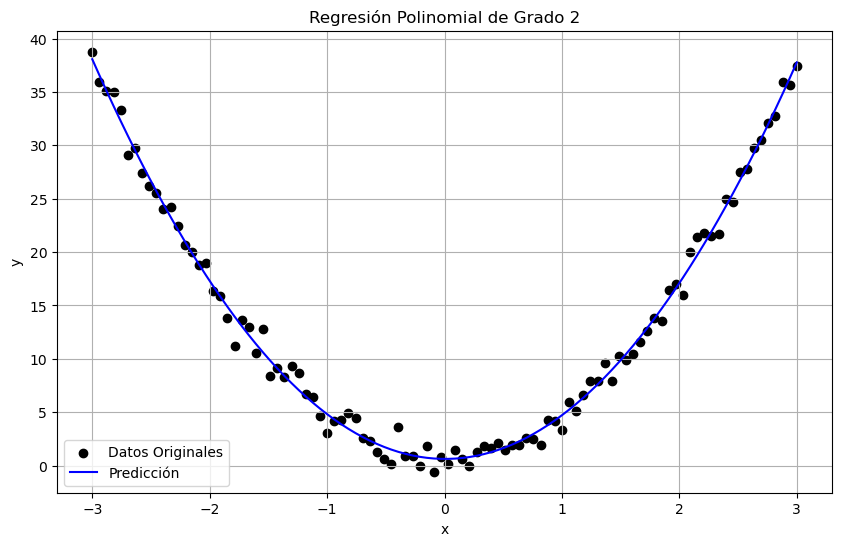

Intercepto:  0.619420963180481 Coeficiente(s):  [-0.04955448  4.14388884] R2:  0.9934118040713642


In [30]:
regression_array(x, y, 2)

Ajusta modelos de grados 3, 5, 7, 9, y 11. Calcula su $R^2$.

Crea una gráfica por cada modelo con las observaciones y su curva.

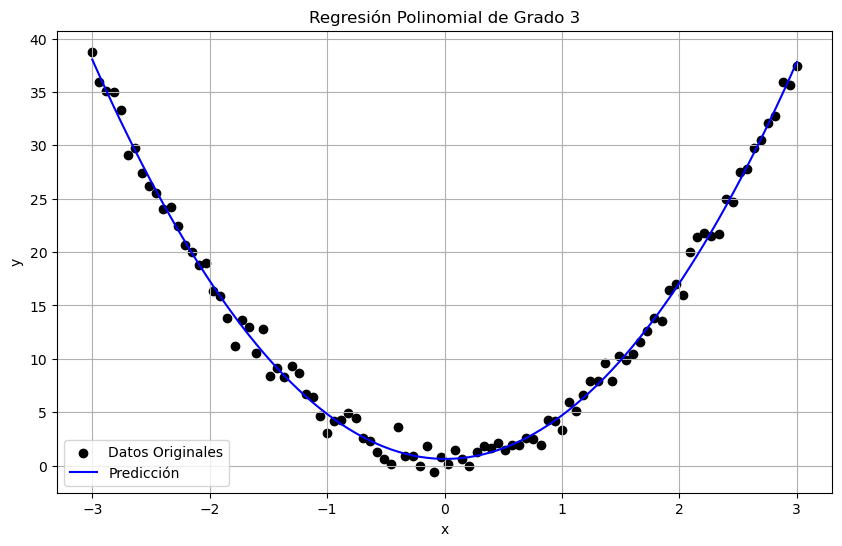

Intercepto:  0.6194209631804846 Coeficiente(s):  [-6.55753967e-02  4.14388884e+00  2.90847549e-03] R2:  0.9934129585186598


In [33]:
#REGRESION GRADO 3
regression_array(x,y, 3)

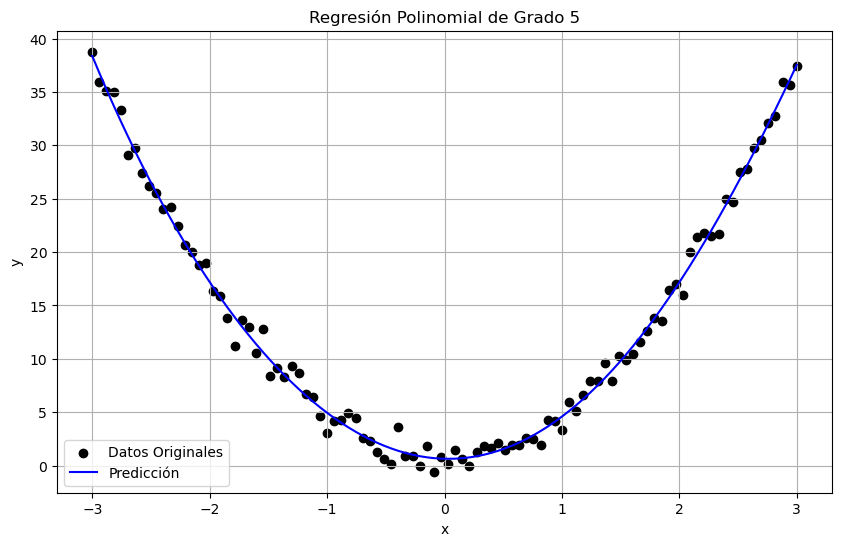

Intercepto:  0.6337116478282621 Coeficiente(s):  [-2.76393644e-01  4.12831746e+00  1.10135698e-01  1.97920171e-03
 -1.05167018e-02] R2:  0.9934954953676421


In [34]:
#REGRESION GRADO 5
regression_array(x,y, 5)

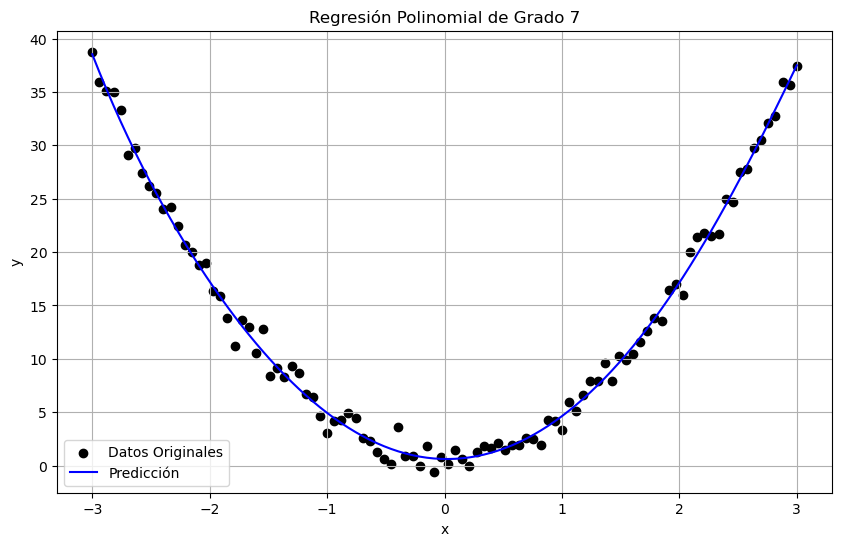

Intercepto:  0.6101810919961537 Coeficiente(s):  [-1.75155617e-01  4.18219958e+00  1.07431886e-02 -1.56446593e-02
  1.33331414e-02  1.40889740e-03 -1.61012799e-03] R2:  0.9935089341876935


In [35]:
#REGRESION GRADO 7
regression_array(x,y, 7)

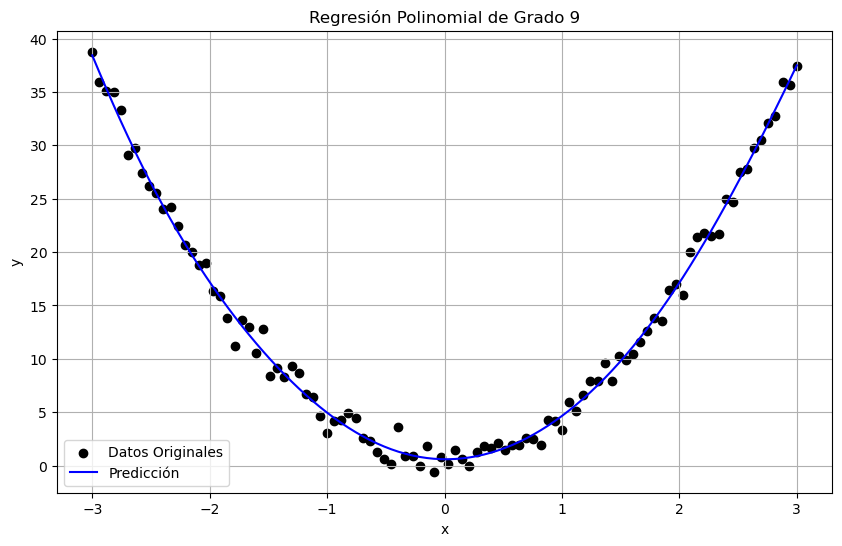

Intercepto:  0.58901859964962 Coeficiente(s):  [-1.10778098e-01  4.26535653e+00 -9.23732104e-02 -6.55597796e-02
  5.72464222e-02  1.08500851e-02 -8.45937252e-03 -5.51840642e-04
  3.53081565e-04] R2:  0.9935141799662259


In [36]:
#REGRESION GRADO 9
regression_array(x,y, 9)

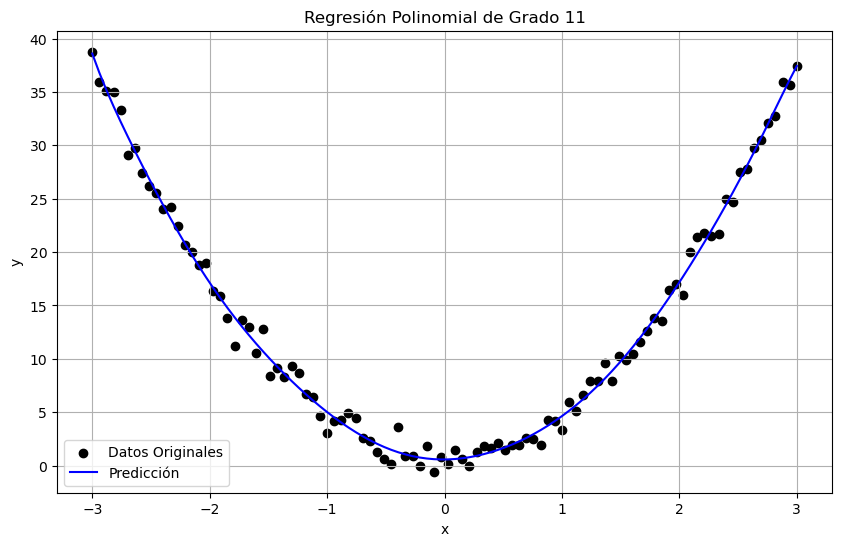

Intercepto:  0.567083964495712 Coeficiente(s):  [ 9.00703987e-02  4.39720527e+00 -5.68294874e-01 -1.90428125e-01
  3.69496567e-01  5.17798355e-02 -9.13700221e-02 -5.98142327e-03
  9.92036867e-03  2.50411792e-04 -3.99285153e-04] R2:  0.9935338704150221


In [37]:
#REGRESION GRADO 11
regression_array(x,y, 11)

**¿Cuál modelo consideras que es mejor? ¿Por qué?**

- Considero que el mejor modelo es el de grado 2. Esto debido a que la estructura aparente de los datos es parecida a una parábola, misma que describe el modelo de segundo grado. Conforme aumenta el grado del modelo la curva va aumentando su R2, por lo que se puede asumir que mejora el modelo pero en realidad tenemos que analizar si el modelo es mejor o solo se esta sobreajustando a nuestros datos. 

Recuerda que una de las metas de ajustar modelos es para poder interpolar y extrapolar. Los datos que tenemos mantienen $x \in [-3, 3]$. ¿Qué pasaría si quisiéramos saber el valor de $y$ cuando $x=5$?

Calcula la predicción $\hat{y}$ para todos los modelos creados (grados 2, 3, 5, 7, 9, y 11).

In [85]:
def regression_array_prediction(x, y, degree, bound):
    x = np.reshape(x, [-1,1])
    y = np.reshape(y, [-1,1]) 
    
    X = x.copy()
    for i in range(2, degree+1):
        X = np.hstack((X, x**i))

    model = LinearRegression()
    model.fit(X, y)

    intercept = model.intercept_
    coef = model.coef_
    r2 = model.score(X, y)

    #Expansión opcional de la predicción
    x_min = x.min()
    x_max = x.max()
    x_extended = np.linspace(x_min - bound, 
                             x_max + bound, 
                             100).reshape(-1,1)
    
    X_extended = x_extended.copy()
    for i in range(2, degree+1):
        X_extended = np.hstack((X_extended, x_extended**i))
    
    y_pred_extended = model.predict(X_extended)

    plt.figure(figsize=(10, 6))
    plt.grid()
    plt.scatter(x, y, color='black', label="Datos Originales")
    plt.plot(x_extended, y_pred_extended, color='blue', label='Predicción Extendida')
    plt.legend(loc="best")
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title(f'Regresión Polinomial de Grado {degree}')
    plt.show()

    print('Intercepto:', intercept[0])
    print('Coeficiente(s):', coef[0])
    print('R2:', r2)

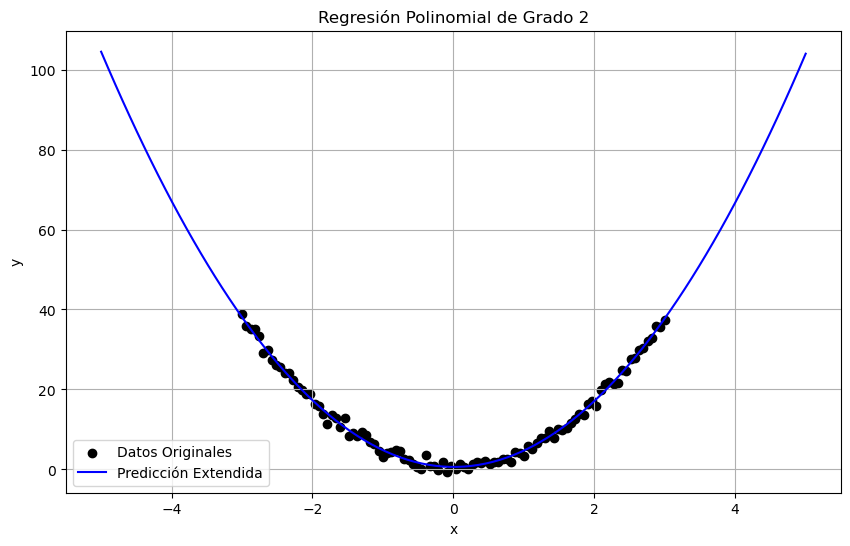

Intercepto: 0.619420963180481
Coeficiente(s): [-0.04955448  4.14388884]
R2: 0.9934118040713642


In [93]:
regression_array_prediction(x, y, 2, 2)

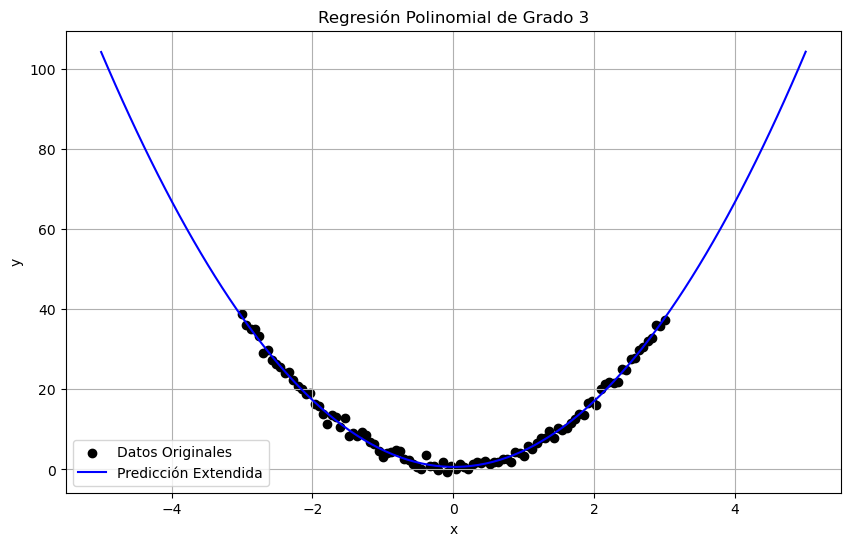

Intercepto: 0.6194209631804846
Coeficiente(s): [-6.55753967e-02  4.14388884e+00  2.90847549e-03]
R2: 0.9934129585186598


In [107]:
regression_array_prediction(x, y, 3, 2)

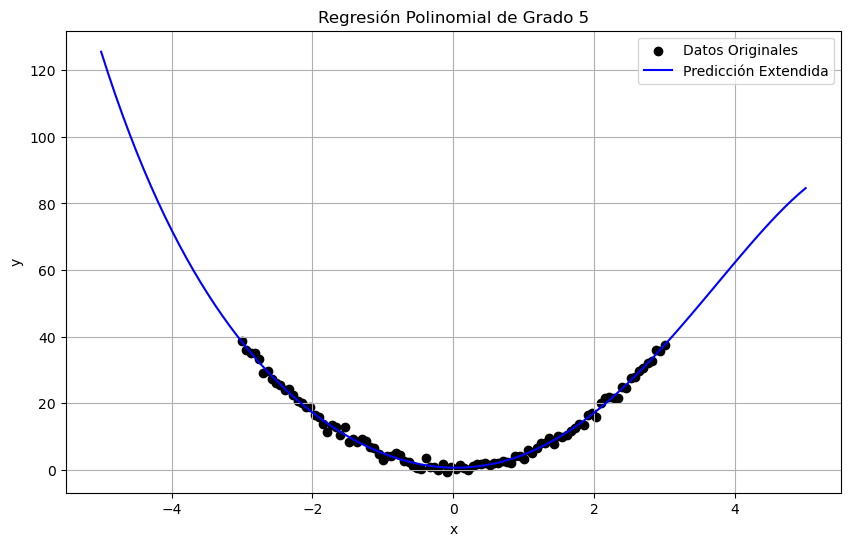

Intercepto: 0.6337116478282621
Coeficiente(s): [-2.76393644e-01  4.12831746e+00  1.10135698e-01  1.97920171e-03
 -1.05167018e-02]
R2: 0.9934954953676421


In [99]:
regression_array_prediction(x, y, 5, 2)

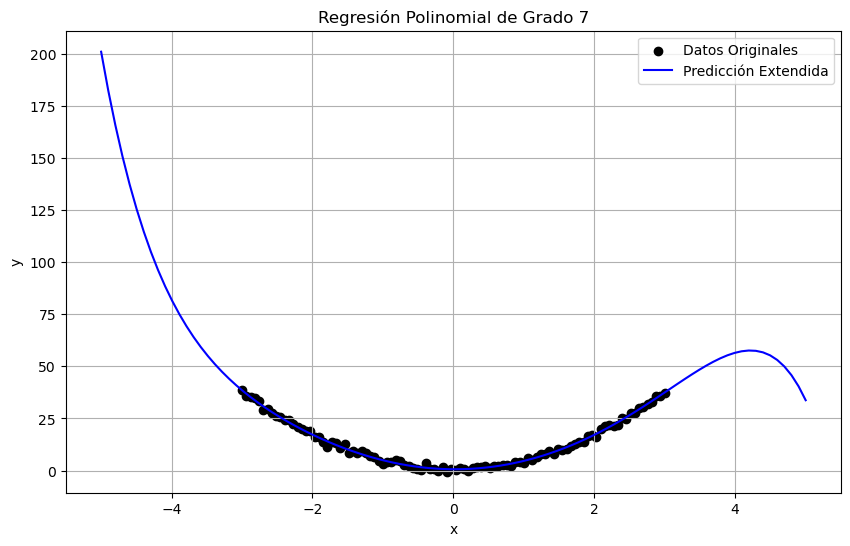

Intercepto: 0.6101810919961537
Coeficiente(s): [-1.75155617e-01  4.18219958e+00  1.07431886e-02 -1.56446593e-02
  1.33331414e-02  1.40889740e-03 -1.61012799e-03]
R2: 0.9935089341876935


In [101]:
regression_array_prediction(x, y, 7, 2)

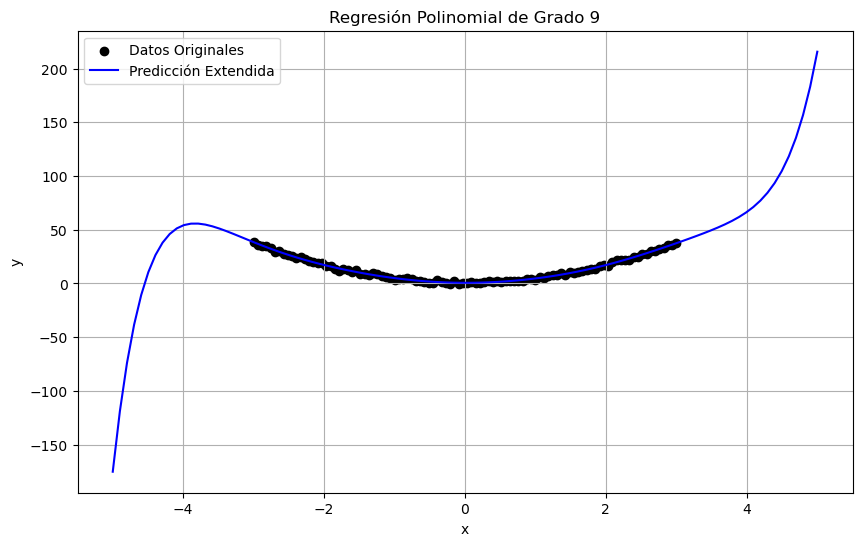

Intercepto: 0.58901859964962
Coeficiente(s): [-1.10778098e-01  4.26535653e+00 -9.23732104e-02 -6.55597796e-02
  5.72464222e-02  1.08500851e-02 -8.45937252e-03 -5.51840642e-04
  3.53081565e-04]
R2: 0.9935141799662259


In [102]:
regression_array_prediction(x, y, 9, 2)

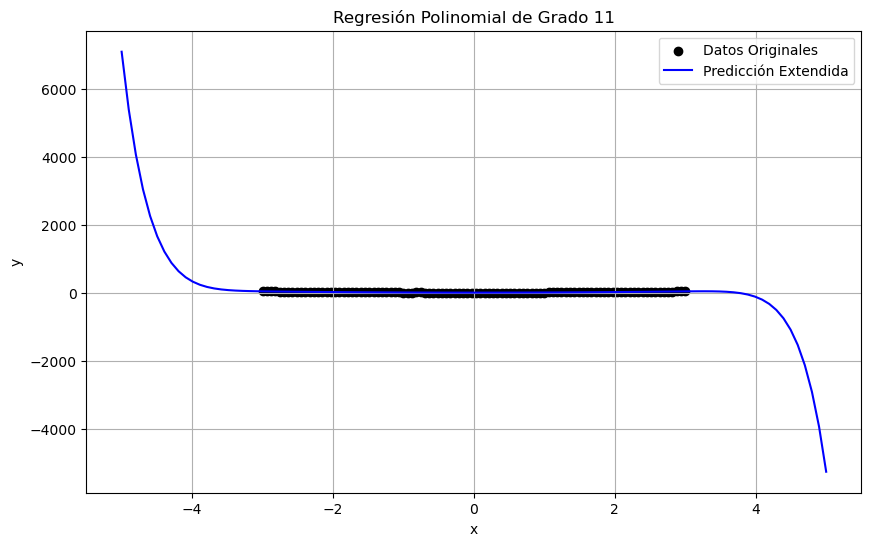

Intercepto: 0.567083964495712
Coeficiente(s): [ 9.00703987e-02  4.39720527e+00 -5.68294874e-01 -1.90428125e-01
  3.69496567e-01  5.17798355e-02 -9.13700221e-02 -5.98142327e-03
  9.92036867e-03  2.50411792e-04 -3.99285153e-04]
R2: 0.9935338704150221


In [105]:
regression_array_prediction(x, y, 11, 2)

¿Cuál modelo crees que sea mejor?

Yo considero que el mejor modelo es el de segundo grado, ya que los R2 son muy acercados entre los modelos más factibles, sin embargo, los incrementos que van a siendo pueden ser producto de un sobreajuste. Es por ello que, analizando la tendencia, es notorio que se ajusta a la forma de un modelo de segundo grado, por lo que es un buen modelo para predecirlo.

## Referencia

James, G., Witten, D., Hastie, T., Tibshirani, R.,, Taylor, J. (2023). An Introduction to Statistical Learning with Applications in Python. Cham: Springer. ISBN: 978-3-031-38746-3